In [66]:
%reset
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [67]:
import numpy as np
from functions import loader, splt, fitter, stats
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew
from uncertainties import *
from uncertainties import unumpy as unp
from math import ceil

savedir = "D03/"

In [68]:
all_data_v1 = loader.load_data( "../NumericS/Plans20221016ForUngaussianityscan_20221016/**/" )
all_data_v2 = loader.load_data( "../NewDepositionData/Plans20221106ForUngaussianityscan_20221106_v2/**/" )

max_len = np.min( [ len( all_data_v1 ), len( all_data_v2 ) ] ) - 1
all_data_v1 = all_data_v1[0:max_len]
all_data_v2 = all_data_v2[0:max_len]
print( max_len )

29


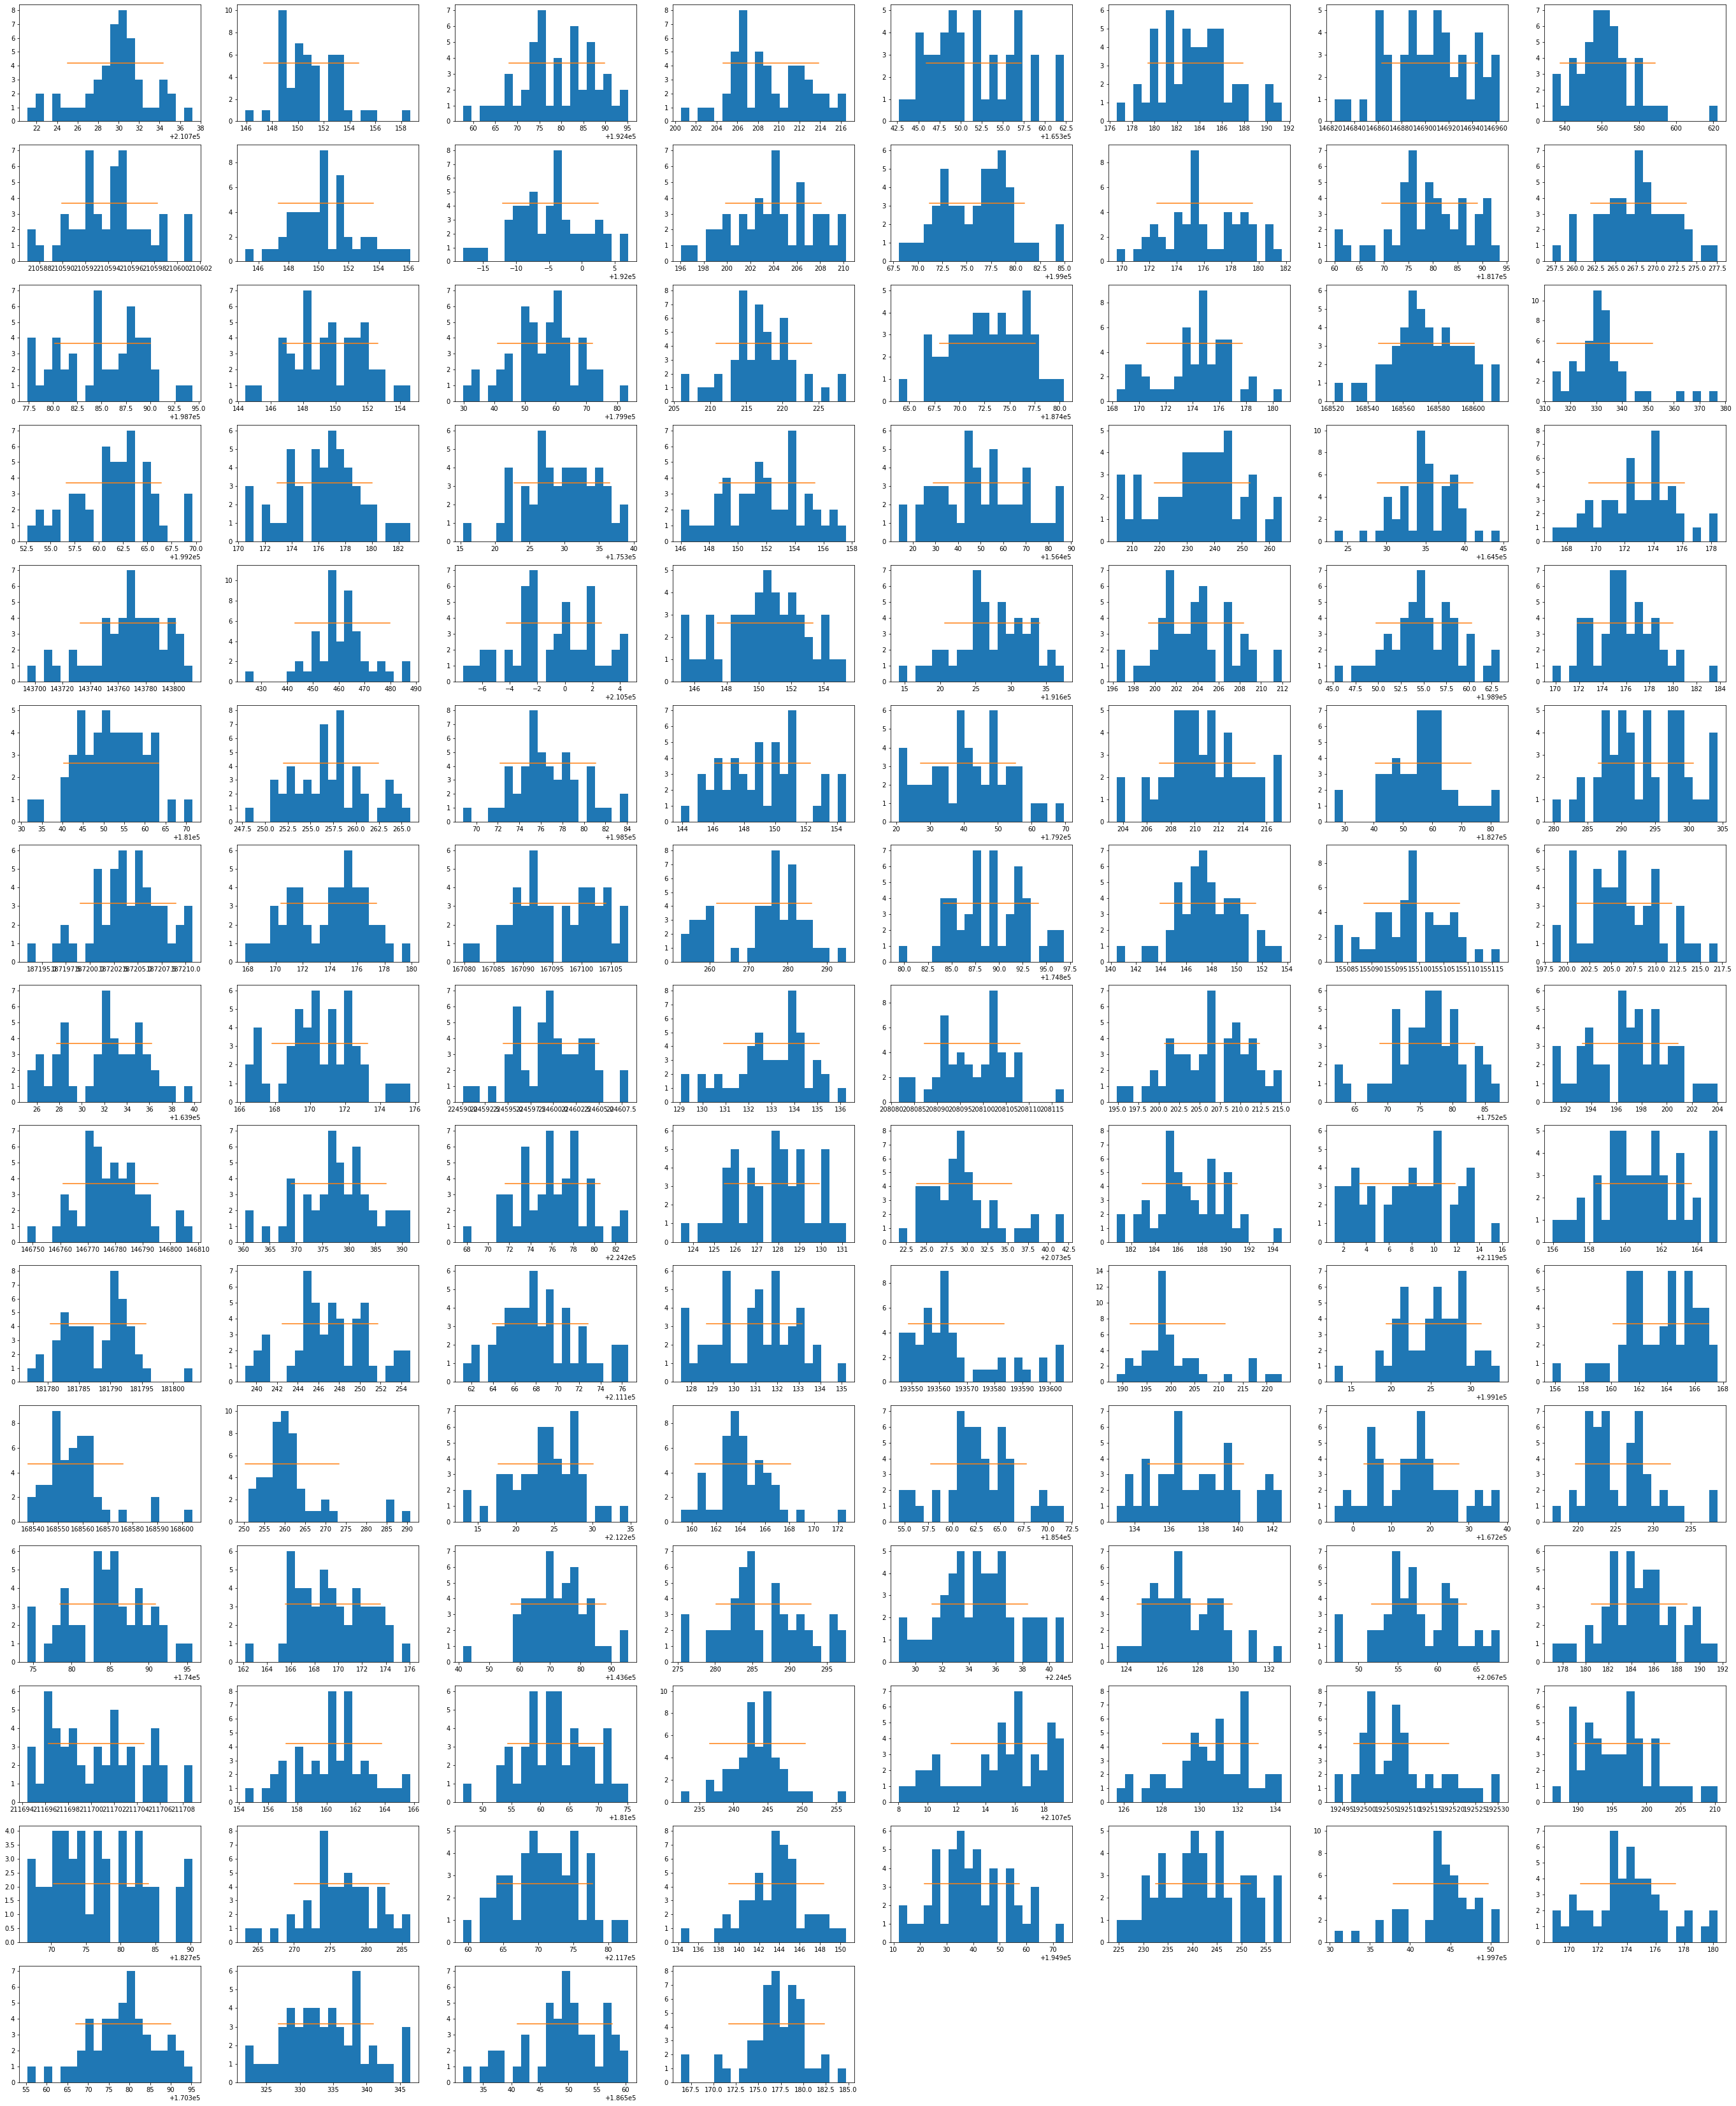

In [77]:
splt.init( ceil( max_len / 2 ), 8 )
for d in [ *all_data_v1, *all_data_v2 ]:
    splt.next() 
    d['mean'] = stats.compute_in_decades( d['chunks'], lambda c: np.mean( c ), hist = True )
    splt.next() 
    d['np_std']  = stats.compute_in_decades( d['chunks'], lambda c: np.std( c, ddof = 1 ), hist = True )

In [73]:
def compat( a, b ):
    return ( a.n - b.n ) / np.sqrt( a.s**2 + b.s**2 )

In [74]:
print( "Side\tGamma\tQ\tType\t\tMean: v1\tv2\tcompat")
for v1, v2 in zip( all_data_v1, all_data_v2 ):
    if( v1['side'] == v2['side']):
        if( v1['gamma'] == v2['gamma']):
            if( v1['defects_frac'] == v2['defects_frac']):
                if( v1['dep_polymers'] == v2['dep_polymers']):
                    print(
                        v1['side'],
                        v1['gamma'],
                        v1['defects_frac'],
                        f"{v1['dep_polymers']:8}",
                        f"{v1['mean']:8}",
                        f"{v2['mean']:8}",
                        f"{compat( v1['mean'], v2['mean'] ):.0f}",
                        'o' if abs( compat( v1['mean'], v2['mean'] ) ) < 3 else 'x',
                        f"{v1['np_std']:8}",
                        f"{v2['np_std']:8}",
                        f"{compat( v1['np_std'], v2['np_std'] ):.0f}",
                        'o' if abs( compat( v1['np_std'], v2['np_std'] ) ) < 3 else 'x',
                        sep='\t' )

Side	Gamma	Q	Type		Mean: v1	v2	compat
512	0.4	0.05	Dimers  	  210730+/-       5	  224600+/-       5	-1981	x	     151+/-       4	   133.0+/-     2.1	4	x
512	0.4	0.05	Linear trimers	  192479+/-      11	  208098+/-      10	-1040	x	     209+/-       5	     207+/-       6	0	o
512	0.4	0.2	Trimers 	  165352+/-       6	  175276+/-       7	-1071	x	     184+/-       4	     197+/-       4	-2	o
512	0.4	0.2	Squared 	1.4690e+05+/-0.0004e+05	  146778+/-      17	3	o	     563+/-      26	     378+/-       9	7	x
512	0.8	0.05	Dimers  	  210594+/-       4	  224276+/-       4	-2239	x	   150.5+/-     3.2	   127.7+/-     2.2	6	x
512	0.8	0.05	Linear trimers	  191995+/-       7	  207330+/-       6	-1646	x	     204+/-       4	     187+/-       4	3	o
512	0.8	0.05	Trimers 	  199076+/-       5	  211908+/-       4	-1996	x	   176.1+/-     3.5	   161.0+/-     2.6	3	x
512	0.8	0.05	Squared 	  181779+/-      10	  181788+/-       8	-1	o	     268+/-       6	     247+/-       5	3	o
512	0.8	0.1	Dimers  	  198785+/-       5	 